In [1]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
glasses = pd.read_csv('../info/glass.csv')

In [3]:
X, y = glasses.drop(['Type', 'Id'], axis=1), glasses['Type']

In [4]:
glasses.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [7]:
max_depth = list(range(1, 5))
max_features = ['sqrt', 'log2', None]
param_grid = {'max_depth': max_depth, 'max_features': max_features}
decision_tree = DecisionTreeClassifier(random_state=42, class_weight='balanced')
grid_model = GridSearchCV(decision_tree, param_grid, cv=5)

In [8]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'max_features': ['sqrt', 'log2', None]})

In [9]:
best_params = grid_model.best_params_
best_params

{'max_depth': 3, 'max_features': None}

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [11]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10), dpi=700)
plot_tree(grid_model.best_estimator_, feature_names=list(glasses.drop(['Type', 'Id'], axis=1).columns), filled=True, fontsize=9);
plt.savefig('report_pictures/glass_tree.png')

In [12]:
print(classification_report(y_test, grid_model.predict(X_test), zero_division=0))

              precision    recall  f1-score   support

           1       0.67      0.91      0.77        11
           2       1.00      0.50      0.67        14
           3       0.33      0.33      0.33         3
           5       0.50      0.50      0.50         4
           6       0.50      1.00      0.67         3
           7       1.00      1.00      1.00         8

    accuracy                           0.72        43
   macro avg       0.67      0.71      0.66        43
weighted avg       0.79      0.72      0.72        43


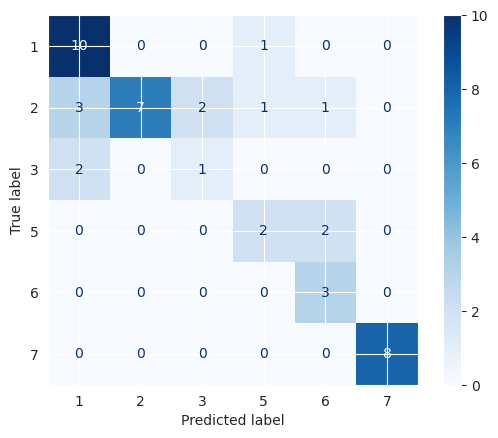

In [13]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test, cmap='Blues')

In [14]:
gini_features_accuracy_scores = {'sqrt': [], 'log2': [], "None": []}
entropy_features_accuracy_scores = {'sqrt': [], 'log2': [], "None": []}
for k in max_depth:
    for j in max_features:
        for c in ['gini', 'entropy']:
            model = DecisionTreeClassifier(random_state=42, max_depth=k, max_features=j, criterion=c)
            model.fit(X_train, y_train)
            if c == 'gini':
                gini_features_accuracy_scores[str(j)].append(model.score(X_test, y_test))
            else:
                entropy_features_accuracy_scores[str(j)].append(model.score(X_test, y_test))

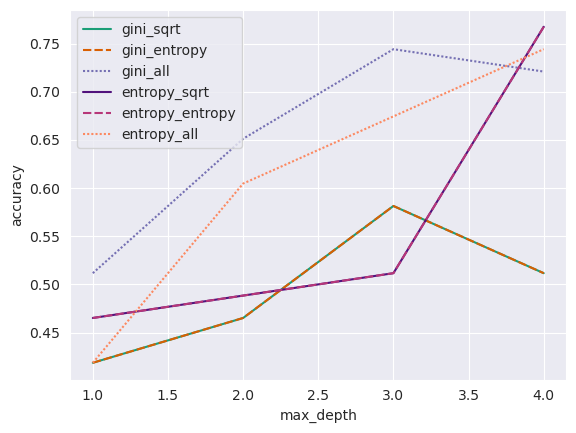

In [15]:
cols1 = ['gini_sqrt', 'gini_entropy', 'gini_all']
j = pd.DataFrame(gini_features_accuracy_scores, index=max_depth)
j.columns = cols1

cols2=['entropy_sqrt', 'entropy_entropy', 'entropy_all']
l = pd.DataFrame(entropy_features_accuracy_scores, index=max_depth)
l.columns = cols2
sns.lineplot(j, palette='Dark2')
sns.lineplot(l, palette='magma')
plt.xlabel('max_depth')
plt.ylabel('accuracy');
plt.savefig('report_pictures/tree_classification.png')

In [16]:
cols1 = ['gini_sqrt', 'gini_entropy', 'gini_all']
j = pd.DataFrame(gini_features_accuracy_scores, index=max_depth)
j.columns = cols1
j

,gini_sqrt,gini_entropy,gini_all
1,0.418605,0.418605,0.511628
2,0.465116,0.465116,0.651163
3,0.581395,0.581395,0.744186
4,0.511628,0.511628,0.720930


In [17]:
pd.DataFrame(entropy_features_accuracy_scores, index=max_depth)

,sqrt,log2,None
1,0.465116,0.465116,0.418605
2,0.488372,0.488372,0.604651
3,0.511628,0.511628,0.674419
4,0.767442,0.767442,0.744186


In [18]:
spam7 = pd.read_csv('../info/spam7.csv')

In [19]:
spam7.head()

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,y
1,1028,0.180,0.372,0.43,0.43,0.21,y
2,2259,0.184,0.276,0.06,1.16,0.06,y
3,191,0.000,0.137,0.00,0.00,0.00,y
4,191,0.000,0.135,0.00,0.00,0.00,y


In [20]:
X, y = spam7.drop('yesno', axis=1), spam7['yesno']
len(X)

4601

In [21]:
y = y.map({'y' : 1, 'n' : 0})

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
model = DecisionTreeClassifier(random_state=101)

In [24]:
max_depth = list(range(1, 5))
criterion = ['gini', 'entropy', 'log_loss']
max_features = ['sqrt', 'log2', None, 3]
param_grid = {'max_depth': max_depth, 'max_features': max_features, 'criterion': criterion}
grid_spam = GridSearchCV(model, param_grid, cv=10)
grid_spam.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=101),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4],
                         'max_features': ['sqrt', 'log2', None, 3]})

In [25]:
grid_spam.best_params_

{'criterion': 'gini', 'max_depth': 4, 'max_features': 3}

In [26]:
print(classification_report(y_test, grid_spam.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       804
           1       0.90      0.76      0.82       577

    accuracy                           0.87      1381
   macro avg       0.87      0.85      0.86      1381
weighted avg       0.87      0.87      0.86      1381


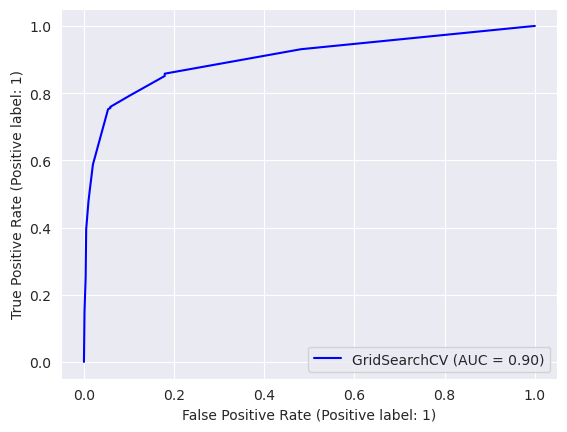

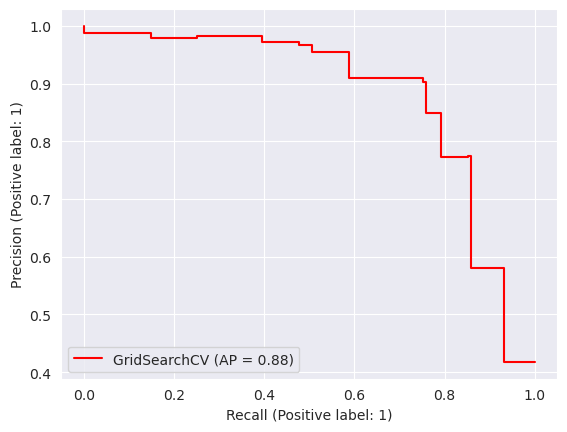

In [27]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
RocCurveDisplay.from_estimator(grid_spam, X_test, y_test, color='blue')
PrecisionRecallDisplay.from_estimator(grid_spam, X_test, y_test, color='red');

In [28]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10), dpi=700)
plot_tree(grid_spam.best_estimator_, feature_names=list(X.columns), filled=True, fontsize=9);
plt.savefig('report_pictures/spam7.png')

In [29]:
#sers = pd.Series(rfc.feature_importances_, index=X.columns).sort_values()
#imps = pd.DataFrame(sers, columns=['Importances'])
#sns.barplot(data=imps, x=imps.index, y='Importances')
#plt.xticks(rotation=90);

In [30]:
mod = DecisionTreeClassifier(max_depth=4, max_features=3, random_state=101)

In [31]:
mod.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features=3, random_state=101)

In [32]:
mod.feature_importances_

array([8.30858380e-02, 5.75290582e-01, 2.25744700e-01, 1.02609046e-01,
       1.32136799e-02, 5.61546454e-05])

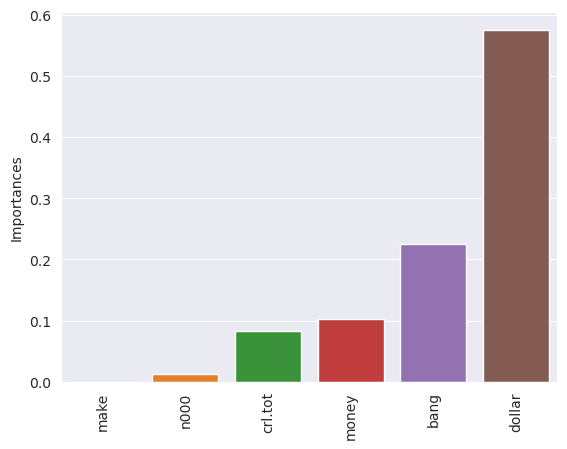

In [33]:
sers = pd.Series(mod.feature_importances_, index=X.columns).sort_values()
imps = pd.DataFrame(sers, columns=['Importances'])
sns.barplot(data=imps, x=imps.index, y='Importances')
plt.xticks(rotation=90);
plt.savefig('report_pictures/feature_importances.png')